In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Own dataset

* The dataset contain year wise co2 and temperature difference data.

In [2]:
df = pd.read_csv("co2_temperature.csv")
df.head()

,Year,CO2,Temperature_change
0,1961,2580,0.0818
1,1962,2686,0.0924
2,1963,2833,0.1100
3,1964,2995,-0.1461
4,1965,3130,-0.0752


In [3]:
df.shape

(50, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                50 non-null     int64  
 1   CO2                 50 non-null     int64  
 2   Temperature_change  50 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [5]:
df.describe()

,Year,CO2,Temperature_change
count,50.00000,50.000000,50.000000
mean,1985.50000,5625.820000,0.278896
std,14.57738,1703.260675,0.240433
min,1961.00000,2580.000000,-0.146100
25%,1973.25000,4600.500000,0.092725
50%,1985.50000,5523.000000,0.275400
75%,1997.75000,6634.750000,0.455150
max,2010.00000,9167.000000,0.700800


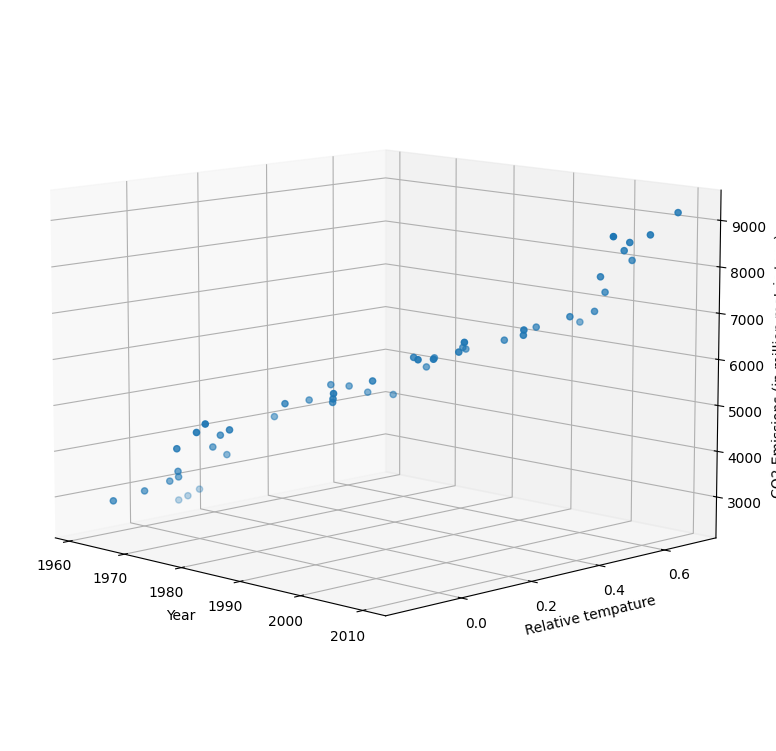

In [6]:
from mpl_toolkits.mplot3d import Axes3D           
fig = plt.figure()                                  
fig.set_size_inches(12.5, 9.5)                     
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs= df['Year'],ys=df['Temperature_change'],zs = df['CO2']) # scatter plot
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions (in million metric tons)')
ax.view_init(10, -45)
plt.show()

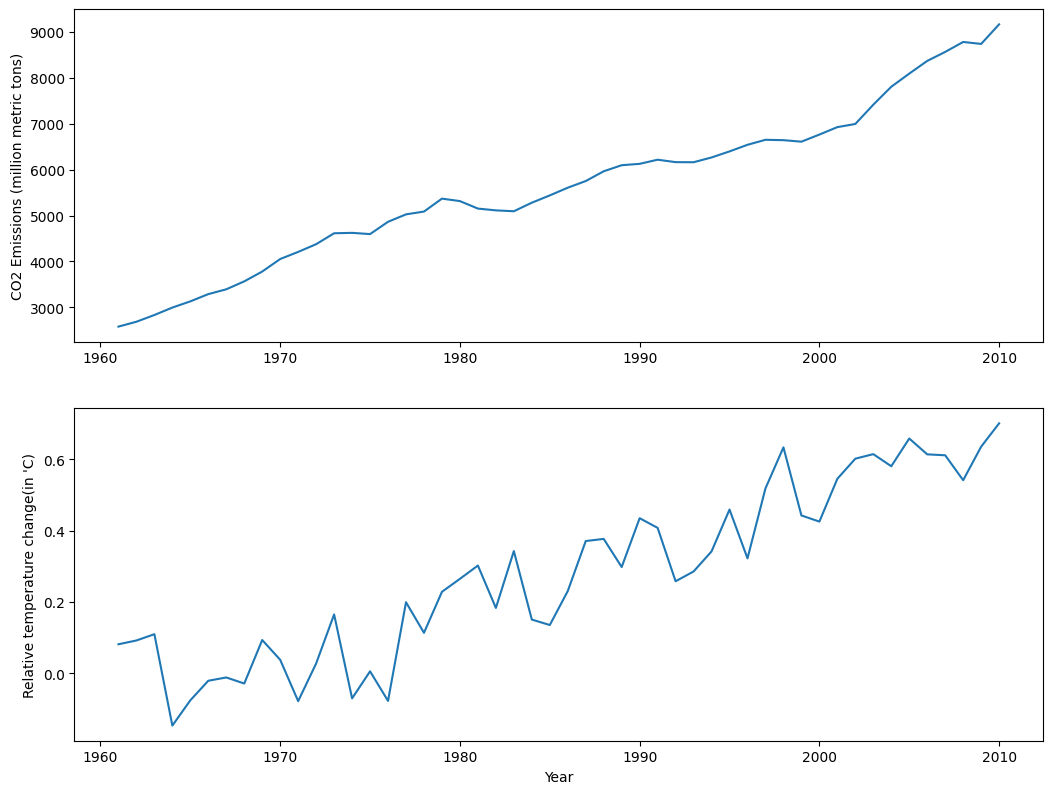

In [7]:
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.plot(df['Year'],df['CO2'])
plt.ylabel('CO2 Emissions (million metric tons)')

plt.subplot(2, 1, 2)
plt.plot(df['Year'],df['Temperature_change'])
plt.xlabel('Year')
plt.ylabel("Relative temperature change(in 'C)")

plt.show()

In [8]:
df.head()

,Year,CO2,Temperature_change
0,1961,2580,0.0818
1,1962,2686,0.0924
2,1963,2833,0.1100
3,1964,2995,-0.1461
4,1965,3130,-0.0752


### Split the dataset

In [9]:
X = df['Year'].values
y = df['Temperature_change'].values

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(-1,1), y.reshape(-1,1), test_size= 0.25, shuffle=False)

## Linear Regression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [13]:
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean squared error : {MSE}")

Mean squared error : 0.009763461396018537


In [14]:
r2_score_ = r2_score(y_test, y_pred)
print(f"R2 score : {r2_score_}")

R2 score : -0.6807757772371528


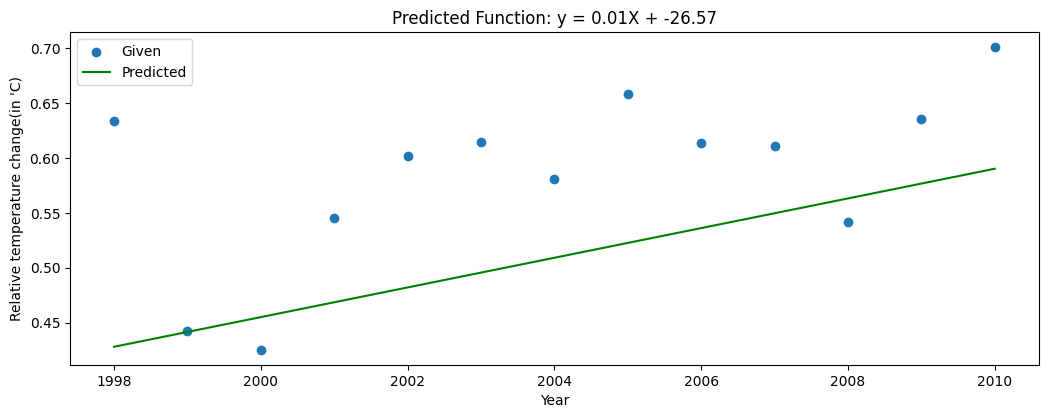

In [15]:
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.scatter(X_test,y_test,label='Given')
plt.plot(X_test,y_pred, color='green',label='Predicted')
plt.xlabel('Year')
plt.ylabel("Relative temperature change(in 'C)")
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (reg.coef_[0], reg.intercept_[0])
plt.title(titlestr)
plt.legend()
plt.show()

## Multilinear regression

In [16]:
X = df.drop(['Temperature_change'], axis=1)
y = df['Temperature_change'].values

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y.reshape(-1,1), test_size= 0.25, shuffle=False)

In [18]:
# Initialize the standardizer
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [20]:
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean squared error : {MSE}")

Mean squared error : 0.012639292655687593


In [21]:
r2_score_ = r2_score(y_test, y_pred)
print(f"R2 score : {r2_score_}")

R2 score : -1.1758489203177684


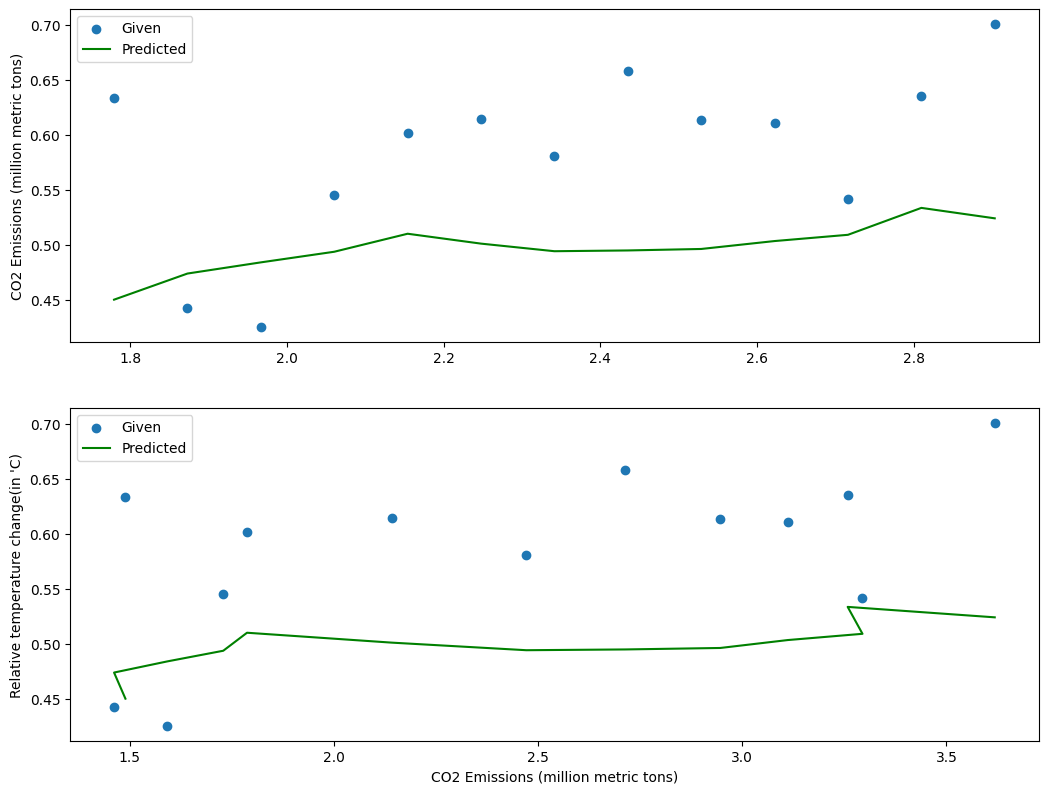

In [22]:
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)

plt.subplot(2, 1, 1)
plt.scatter(X_test[:,0], y_test, label='Given')
plt.plot(X_test[:,0], y_pred, color='green', label='Predicted')
plt.ylabel('CO2 Emissions (million metric tons)')
plt.legend()


plt.subplot(2, 1, 2)
plt.scatter(X_test[:,1], y_test, label='Given')
plt.plot(X_test[:,1], y_pred, color='green', label='Predicted')
plt.xlabel('CO2 Emissions (million metric tons)')
plt.ylabel("Relative temperature change(in 'C)")
plt.legend()

plt.show()


# Given Dataset

In [23]:
df = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")

In [24]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
df.shape

(500, 9)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [27]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [28]:
df = df.drop(['Serial No.'], axis=1)

In [29]:
X = df.drop(['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print(f"Number of training examples: {X_train.shape[0]}")
print(f"Number of testing examples: {X_test.shape[0]}")

Number of training examples: 400
Number of testing examples: 100


### Linear Regression

In [31]:
reg = LinearRegression()

In [32]:
reg.fit(X_train['CGPA'].values.reshape(-1,1), y_train)

LinearRegression()

In [33]:
y_pred = reg.predict(X_test['CGPA'].values.reshape(-1,1))

In [34]:
reg.intercept_

-1.0182042839120313

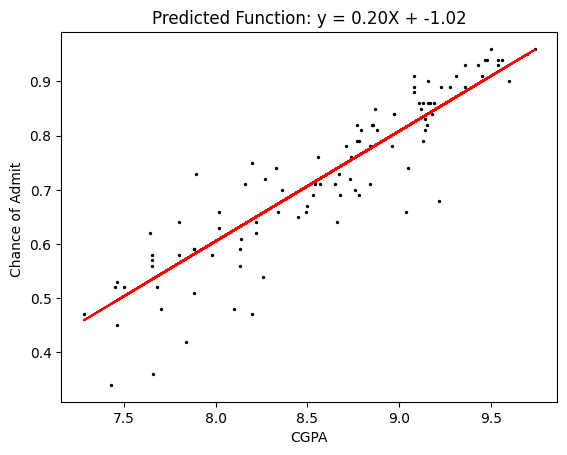

In [35]:
plt.scatter(X_test['CGPA'], y_test,  color='black',s=2)
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')
plt.plot(X_test['CGPA'], y_pred, color='red')
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (reg.coef_[0], reg.intercept_)
plt.title(titlestr)
plt.show()

In [36]:
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean squared error : {MSE}")

Mean squared error : 0.00387225142355091


In [37]:
r2_score_ = r2_score(y_test, y_pred)
print(f"R2 score : {r2_score_}")

R2 score : 0.8290680477081549


### Multiple Linear Regression

In [38]:
X = df.drop(['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print(f"Number of training examples: {X_train.shape[0]}")
print(f"Number of testing examples: {X_test.shape[0]}")

Number of training examples: 400
Number of testing examples: 100


In [40]:
# Initialize the standardizer
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
reg = LinearRegression()

In [42]:
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = reg.predict(X_test)

In [44]:
X_test[:,-2].shape

(100,)

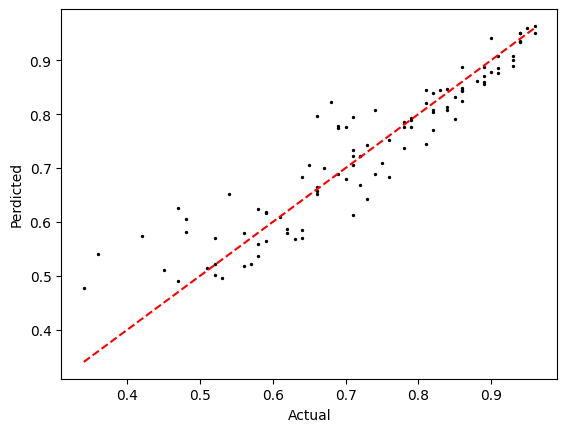

In [45]:
plt.scatter(y_test, y_pred,  color='black',s=2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Perdicted')
plt.show()

In [46]:
MSE = mean_squared_error(y_test, y_pred)
print(f"Mean squared error : {MSE}")

Mean squared error : 0.0030965712093589813


In [47]:
r2_score_ = r2_score(y_test, y_pred)
print(f"R2 score : {r2_score_}")

R2 score : 0.8633087306761005


# Classification

In [48]:
df = pd.read_csv("Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [50]:
df = df.drop(['Serial No.'], axis=1)

In [51]:
df['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

In [52]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [53]:
# columns_for_transformation = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply the scaler to the numerical columns
# df[columns_for_transformation] = scaler.fit_transform(df[columns_for_transformation])

In [54]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


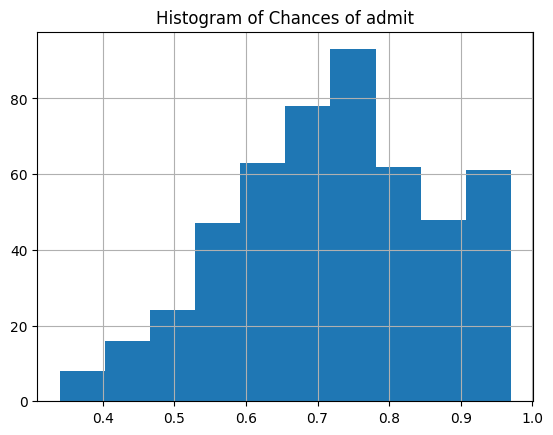

In [55]:
df['Chance of Admit '].hist(bins=10)
plt.title("Histogram of Chances of admit")
plt.show()

In [56]:
def convert_to_categorical(chance_probability):
    if chance_probability >= 0.8:
        return "High"
    elif chance_probability >= 0.6:
        return "Medium"
    else:
        return "Low"

df['Admit_chance_categorical'] = df['Chance of Admit '].apply(convert_to_categorical)
df.drop(['Chance of Admit '],axis=1, inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_chance_categorical
0,337,118,4,4.5,4.5,9.65,1,High
1,324,107,4,4.0,4.5,8.87,1,Medium
2,316,104,3,3.0,3.5,8.00,1,Medium
3,322,110,3,3.5,2.5,8.67,1,High
4,314,103,2,2.0,3.0,8.21,0,Medium


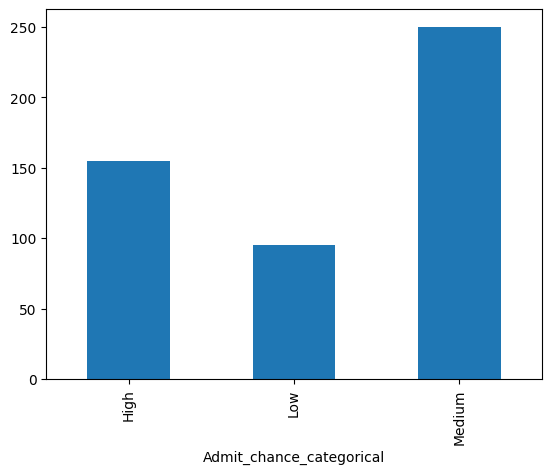

In [57]:
df['Admit_chance_categorical'].value_counts().sort_index().plot(kind='bar')
plt.show()

### Split the dataset

In [58]:
X = df.drop(['Admit_chance_categorical'],axis=1)
y = df['Admit_chance_categorical']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

print(f"Number of training examples: {X_train.shape[0]}")
print(f"Number of testing examples: {X_test.shape[0]}")

Number of training examples: 400
Number of testing examples: 100


In [60]:
clf = DecisionTreeClassifier(max_depth=3, random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [61]:
y_pred = clf.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.78


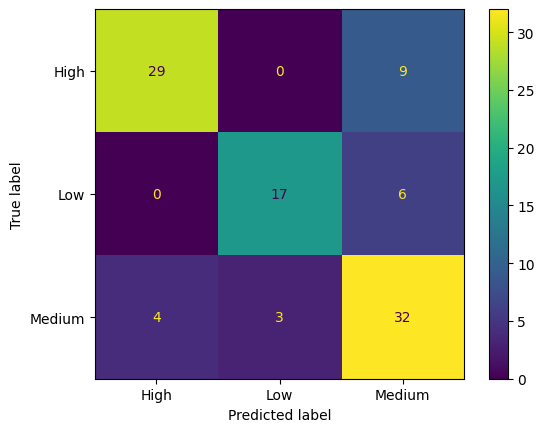

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

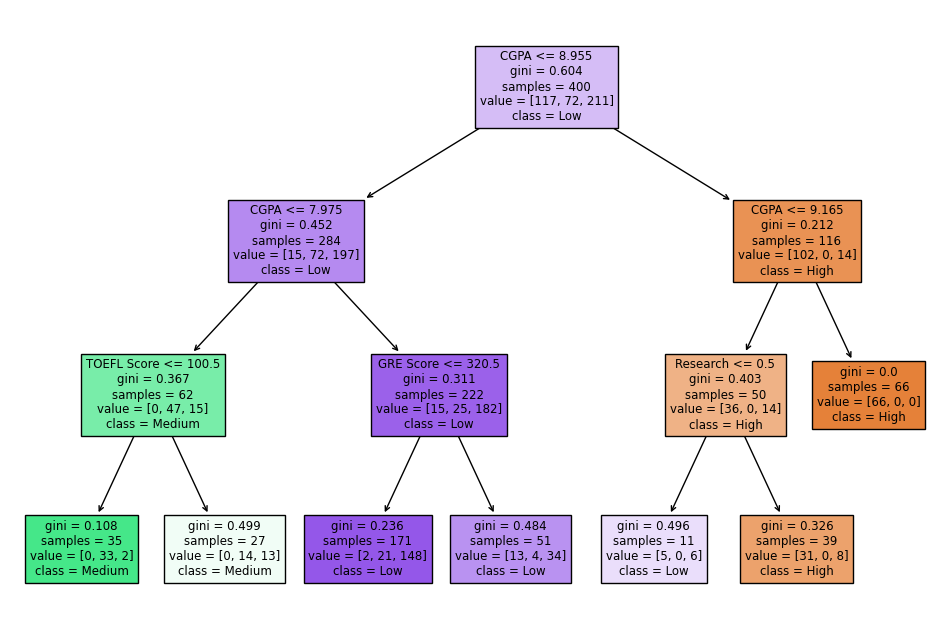

In [64]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the size of the figure
plot_tree(clf, filled=True, feature_names=X_test.columns, class_names=["High", "Medium","Low"])
plt.show()


In [65]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X_test.columns))
print(tree_rules)


|--- CGPA <= 8.95
|   |--- CGPA <= 7.97
|   |   |--- TOEFL Score <= 100.50
|   |   |   |--- class: Low
|   |   |--- TOEFL Score >  100.50
|   |   |   |--- class: Low
|   |--- CGPA >  7.97
|   |   |--- GRE Score <= 320.50
|   |   |   |--- class: Medium
|   |   |--- GRE Score >  320.50
|   |   |   |--- class: Medium
|--- CGPA >  8.95
|   |--- CGPA <= 9.16
|   |   |--- Research <= 0.50
|   |   |   |--- class: Medium
|   |   |--- Research >  0.50
|   |   |   |--- class: High
|   |--- CGPA >  9.16
|   |   |--- class: High



### Conclusion

* From the above rule it is pretty much clear that above CGPA 9.16, the chance of admission is high.
* If the CGPA is above 8.95 and less than 9.16 and someone has an experience in research then also the chance of admission is high.
* If CGPA score more than 7.97 and less than 8.95 then the chances are medium.
* Similarly if CGPA is less than 7.97, than chances are Low.

# C: Classification Tree Part

In [66]:
import pandas as pd
import numpy as np

* We copy the data from pdf to a csv file.

In [67]:
df = pd.read_csv("task3.csv")
df

,color,shape,size,class
0,red,square,big,+
1,blue,square,big,+
2,red,round,small,-
3,green,square,small,-
4,red,round,big,+
5,green,round,big,-


### Calculating Initial Entropy

In [68]:
def calculate_intial_entropy(dataset, target_column, unique_classes):
    total_entries = dataset[target_column].shape[0]
    class_counts = dataset[target_column].value_counts()
    entropy = -(class_counts / total_entries) * np.log2((total_entries - class_counts) / total_entries)
    total_entropy = entropy.sum()
    return total_entropy


In [69]:
class_entropy = calculate_intial_entropy(df, 'class', ['+','-']) #Class
print(class_entropy)

1.0


 ### entropy and information gain

In [70]:
import numpy as np
import pandas as pd

def calculate_average_entropy(dataset, target_attr, unique_classes):
    total_entries = dataset.shape[0]
    average_entropy = 0

    for class_value in unique_classes:
        class_subset = dataset[dataset[target_attr] == class_value]
        class_count = class_subset.shape[0]

        if class_count == 0:
            continue

        positive_count = class_subset[class_subset['class'] == '+'].shape[0]
        negative_count = class_count - positive_count

        # Calculate entropy for both positive and negative instances
        positive_entropy = -(positive_count / class_count) * np.log2(positive_count / class_count) if positive_count > 0 else 0
        negative_entropy = -(negative_count / class_count) * np.log2(negative_count / class_count) if negative_count > 0 else 0

        # Total entropy for the class
        class_entropy = positive_entropy + negative_entropy

        # Weighted average entropy
        average_entropy += (class_count / total_entries) * class_entropy

    return round(average_entropy, 2)


In [71]:
color_entropy = calculate_average_entropy(df,'color', ['red','green','blue'])
print("Color-> entropy: ",color_entropy, ", information gain: ", 1-color_entropy)
shape_entropy = calculate_average_entropy(df,'shape', ['square','round']) 
print("Shape-> entropy: ",shape_entropy, ", information gain: ", round(1-shape_entropy, 2))
size_entropy = calculate_average_entropy(df, 'size', ['big','small'])
print("Size-> entropy: ", size_entropy, ", information gain: ", round(1-size_entropy, 2))

Color-> entropy:  0.46 , information gain:  0.54
Shape-> entropy:  0.92 , information gain:  0.08
Size-> entropy:  0.54 , information gain:  0.46


### Decision Tree

In [72]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

df


,color,shape,size,class
0,2,1,0,0
1,0,1,0,0
2,2,0,1,1
3,1,1,1,1
4,2,0,0,0
5,1,0,0,1


In [73]:
X = df[['color', 'shape', 'size']]
y = df['class']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [75]:
clf_entropy = DecisionTreeClassifier(random_state=10)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [76]:
y_pred= clf_entropy.predict(X_test)

Accuracy score on test:  0.0


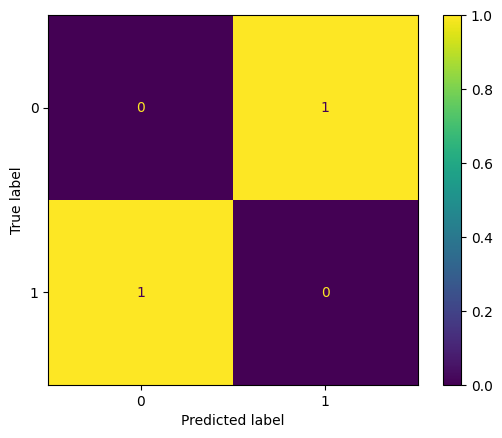

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
print("Accuracy score on test: ", clf_entropy.score(X_test, y_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

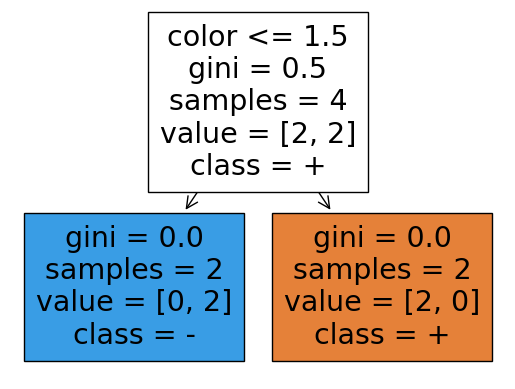

In [78]:
plot_tree(clf_entropy, filled=True, feature_names=X_test.columns, class_names=["+", "-"])
plt.show()

In [79]:
from sklearn.tree import export_text

tree_rules = export_text(clf_entropy, feature_names=list(X_test.columns))
print(tree_rules)


|--- color <= 1.50
|   |--- class: 1
|--- color >  1.50
|   |--- class: 0



### Conclusion

* As we can clearly see that the color is splitted to make the tree as it has the highest information gain.